In [37]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs
# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np . dot (X , transformation )

# Add a bias term to the feature matrix
X = np . c_ [ np . ones (( X . shape [0] , 1) ) , X ]
# Initialize coefficients
W = np . zeros ( X . shape [1])

# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )

# Define the logistic loss ( binary cross - entropy )function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon ) # Clip to avoid log (0)
    return - ( y_true * np . log ( y_pred ) + (1 - y_true ) * np.log (1 - y_pred ) )

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []


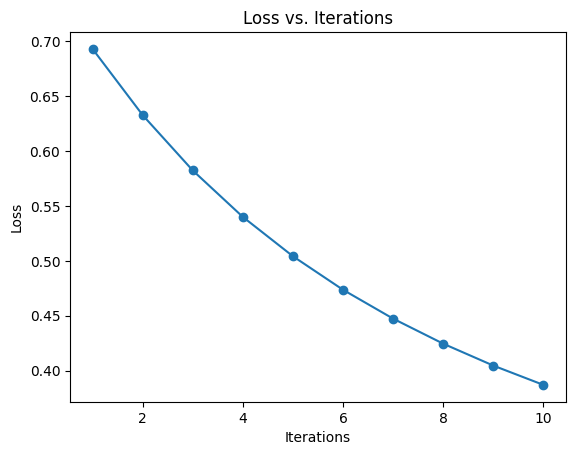

In [38]:
import numpy as np

# Assuming you have already initialized your data and weights as mentioned in your assignment

# Gradient descent parameters
learning_rate = 0.1
iterations = 10
loss_history = []

# Perform batch gradient descent
for i in range(iterations):
    # Calculate the predictions using the current weights
    predictions = sigmoid(np.dot(X, W))
    
    # Calculate the gradient of the loss function
    gradient = np.dot(X.T, (predictions - y)) / len(y)
    
    # Update the weights using the gradient
    W -= learning_rate * gradient
    
    # Calculate the loss and append it to the history
    loss = np.mean(log_loss(y, predictions))
    loss_history.append(loss)

# Plot the loss history
import matplotlib.pyplot as plt
plt.plot(range(1,iterations+1), np.reshape(loss_history, (iterations, 1)), marker = 'o')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


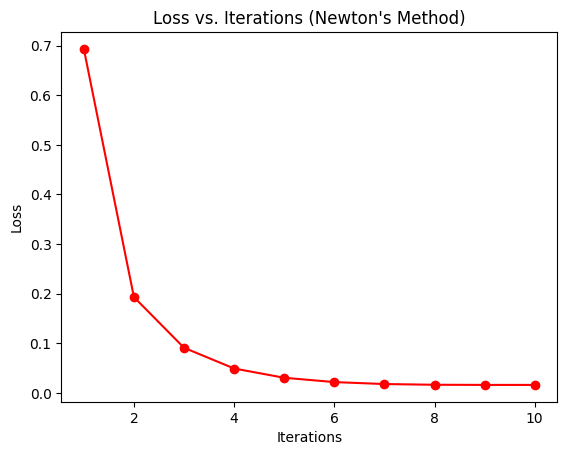

In [41]:
# Initialize coefficients
W_newton = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 10
loss_history_n = []

# Perform Newton's method
for _ in range(iterations):
    # Calculate the predicted probabilities
    y_pred = sigmoid(np.dot(X, W_newton))
    
    # Calculate the diagonal matrix S
    S = np.diag(y_pred * (1 - y_pred))

     # Calculate the gradient
    gradient = np.dot(X.T, y_pred - y) / len(y)
       
    # Calculate the Hessian matrix
    Hessian = np.dot(np.dot(X.T , S), X ) / len(y)
    
    # Update the weights using Newton's method formula
    W_newton -= np.dot(np.linalg.inv(Hessian), gradient)
    
    # Calculate and store the loss
    loss = np.mean(log_loss(y, y_pred))
    loss_history_n.append(loss)
    
import matplotlib.pyplot as plt
plt.plot(range(1,iterations+1), np.reshape(loss_history_n, (iterations, 1)), marker = 'o', color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Newton\'s Method)')
plt.show()

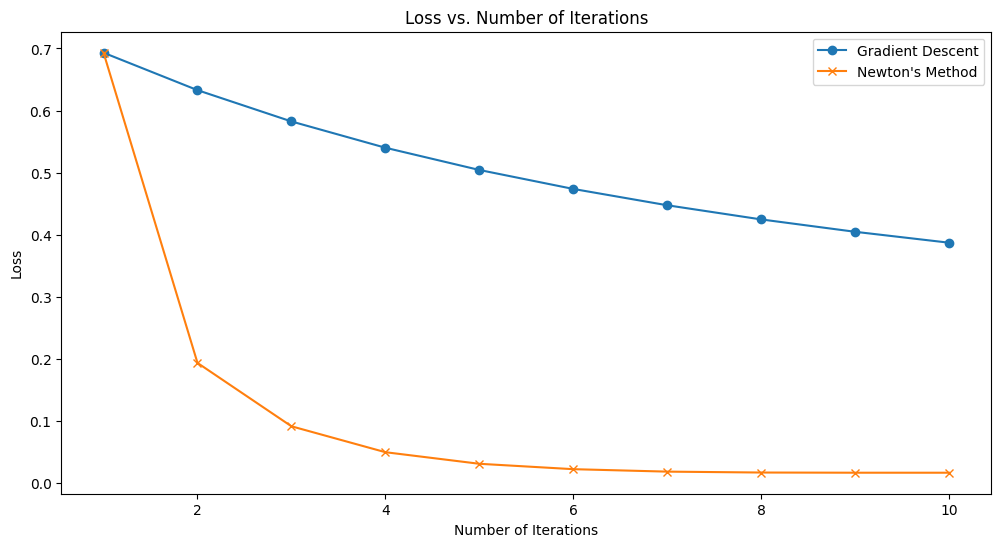

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterations + 1), np.reshape(loss_history, (iterations, 1)), label='Gradient Descent', marker='o')
plt.plot(range(1, iterations + 1), np.reshape(loss_history_n, (iterations, 1)), label="Newton's Method", marker='x')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Number of Iterations')
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state
# data loading
train_samples = 500
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)


c:\Python311\cv\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline with scaling and Lasso Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])



In [53]:
# Define a range of C values to search over
param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_C = grid_search.best_params_['lasso_logistic__C']
print(best_C)


0.31622776601683794


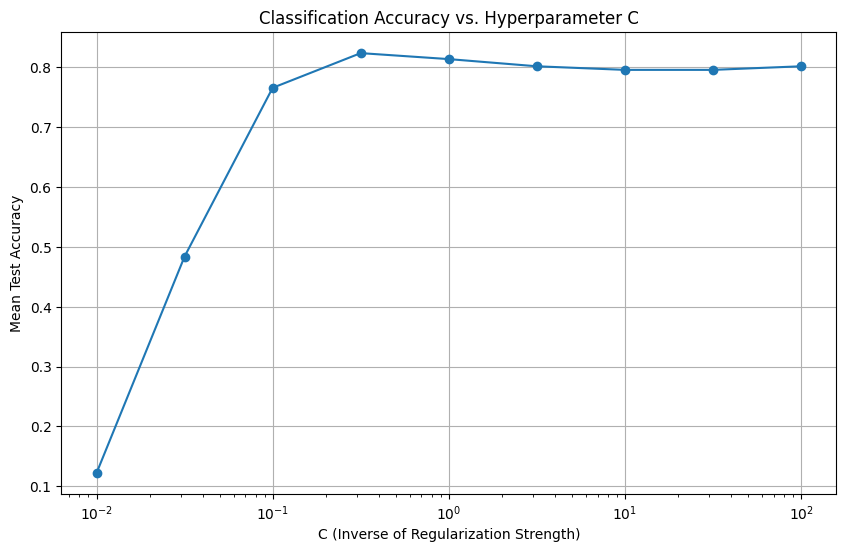

In [50]:
import matplotlib.pyplot as plt

# Get the cross-validation results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Plot accuracy vs. C
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['lasso_logistic__C'], mean_test_scores, marker='o' )
plt.title('Classification Accuracy vs. Hyperparameter C')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)
plt.show()


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Build the final model with the best hyperparameter
final_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto', C=best_C)
final_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_model.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(confusion)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
[[ 5  0  0  0  0  1  1  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  9  0  0  0  0  1]
 [ 0  0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0  1  0  7  0  1  0]
 [ 0  0  0  0  0  0  0 11  0  3]
 [ 0  0  0  0  0  1  0  0 11  0]
 [ 0  0  0  1  1  0  0  0  0 13]]
Precision: 0.87
Recall: 0.86
F1-Score: 0.86


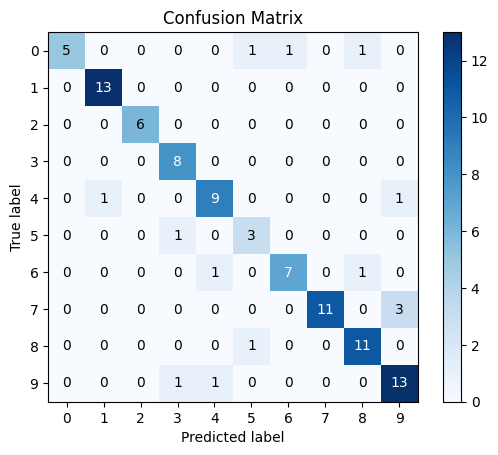

In [52]:
import scikitplot as skplt
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module

# Assuming you have y_test and y_pred defined

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix')
plt.show()


In [51]:
import math

w0 = -6
w1 = 0.05
w2 = 1
x1 = 40
x2 = 3.5

probability = 1 / (1 + math.exp(-(w0 + w1 * x1 + w2 * x2)))
print(f"The estimated probability is: {probability:.2f}")

required_hours = (6 - 3.5) / 0.05
print(f"To achieve a 50% chance of receiving an A+, a student needs to study for {required_hours:.2f} hours.")


The estimated probability is: 0.38
To achieve a 50% chance of receiving an A+, a student needs to study for 50.00 hours.
